In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### Load The Data

In [73]:
df = pd.read_csv("IRIS.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [74]:
df.shape

(150, 5)

In [75]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [77]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [78]:
### check for NaN Values

df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Data Visualization

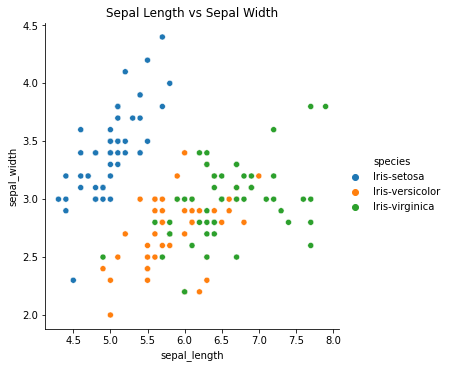

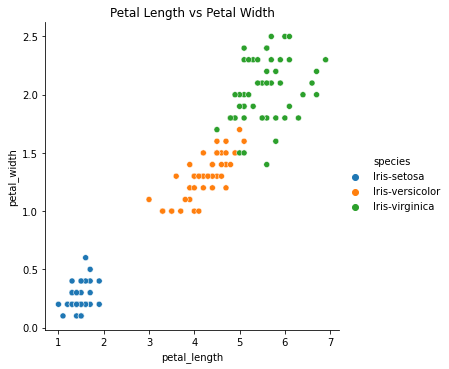

In [79]:
# Scatter plot for Sepal Length and Sepal Width
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Scatter plot for Petal Length and Petal Width
sns.relplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title('Petal Length vs Petal Width')
plt.show()


#### Box Plot

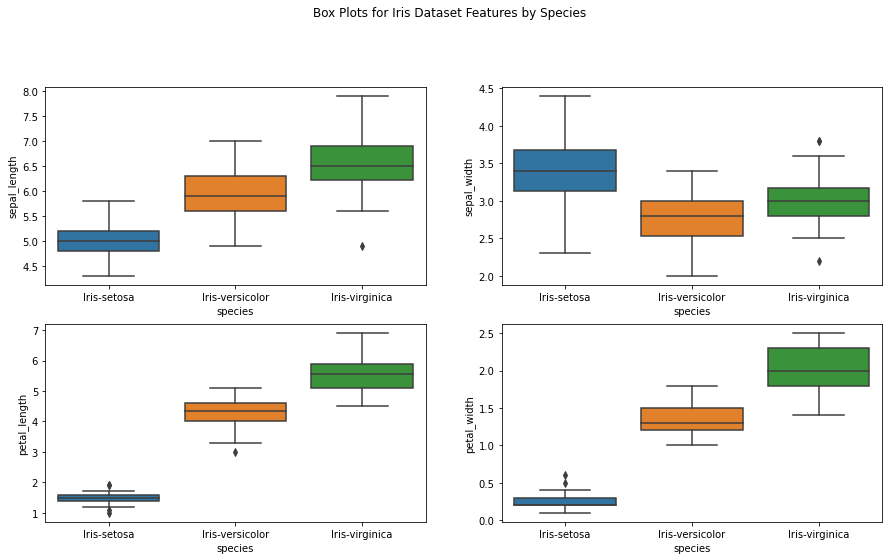

In [80]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=df)

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=df)

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=df)

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=df)

plt.suptitle('Box Plots for Iris Dataset Features by Species', y=1.02)
plt.show()

#### PairPlot

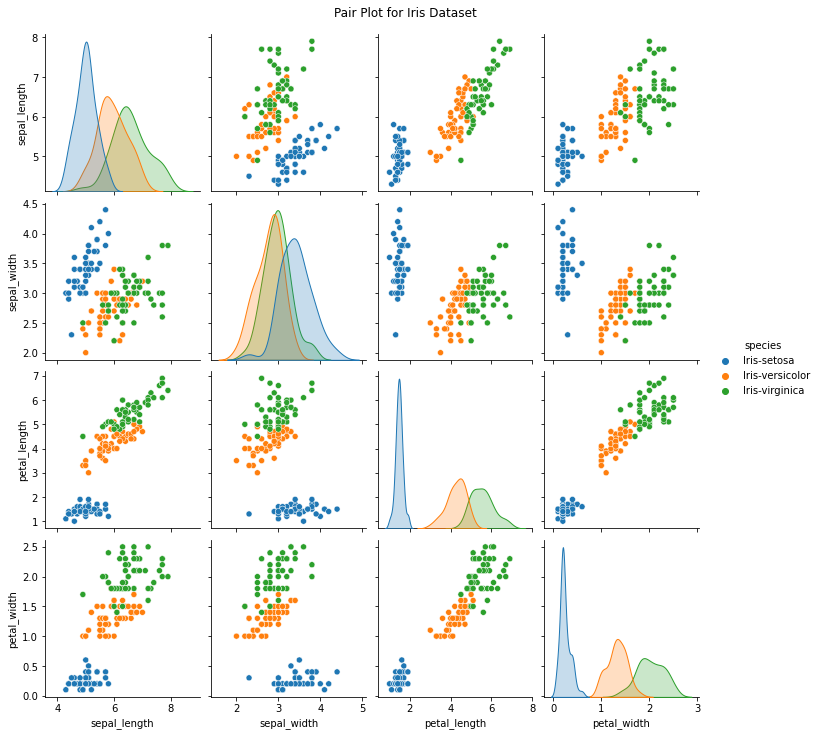

In [81]:
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot for Iris Dataset', y=1.02)
plt.show()

### Correlation Matrix

In [82]:
correlation = df.corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

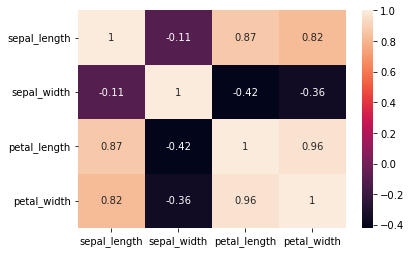

In [83]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

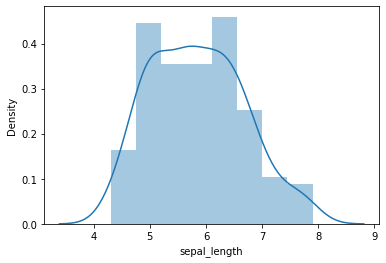

In [84]:
sns.distplot(df['sepal_length']);

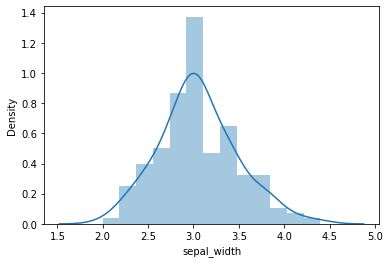

In [85]:
sns.distplot(df['sepal_width']);

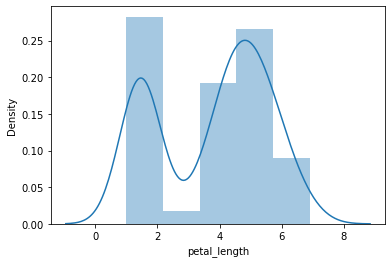

In [86]:
sns.distplot(df['petal_length']);

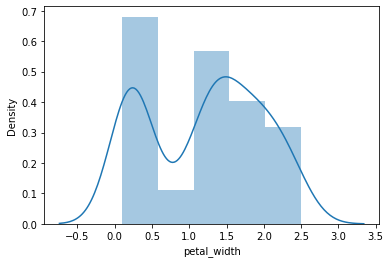

In [87]:
sns.distplot(df['petal_width']);

#### Finding Outliers

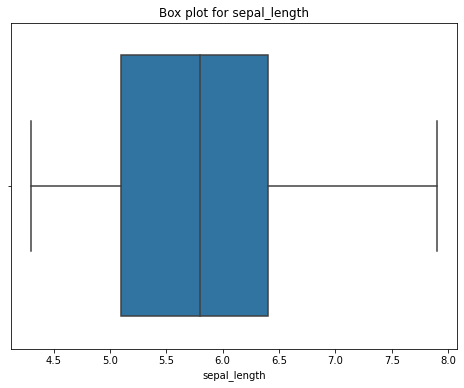

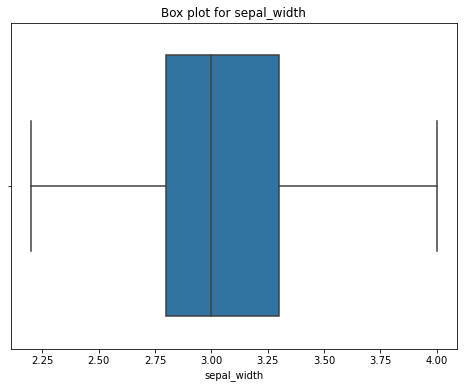

In [88]:
# Function to identify and handle outliers using IQR method
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Replace outliers with median (you can choose a different strategy)
    df.loc[outliers, column] = df[column].median()
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

handle_outliers('sepal_length')

handle_outliers('sepal_width')

# Show the plot
plt.show();

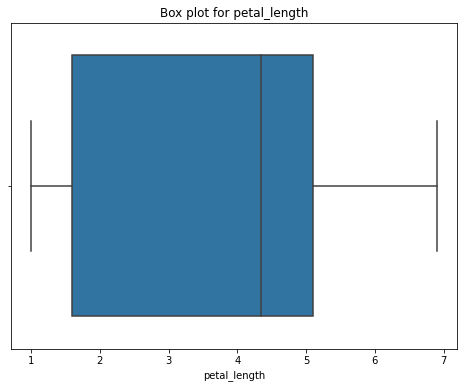

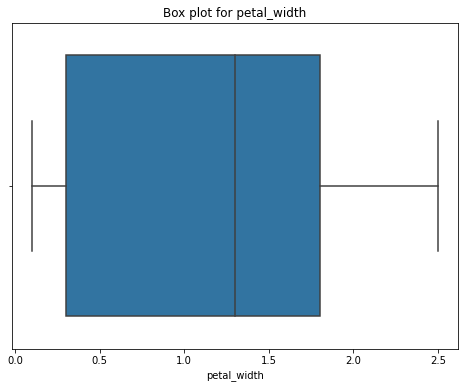

In [89]:
# Function to identify and handle outliers using IQR method
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Replace outliers with median (you can choose a different strategy)
    df.loc[outliers, column] = df[column].median()
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

handle_outliers('petal_length')

handle_outliers('petal_width')

# Show the plot
plt.show();

In [90]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [91]:
mapping = {'Iris-setosa':0 ,'Iris-versicolor':1,'Iris-virginica':2}
df['species'] = df['species'].map(mapping)

In [92]:
df.head(51)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


#### Split The Data

In [93]:
x = df.drop('species',axis=1)
y = df['species']

In [94]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [95]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

### Training and Testing Data

In [96]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

#Make predictions
y_pred1 = lr.predict(x_test)

In [98]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy1 = accuracy_score(y_test,y_pred1)
accuracy1

1.0

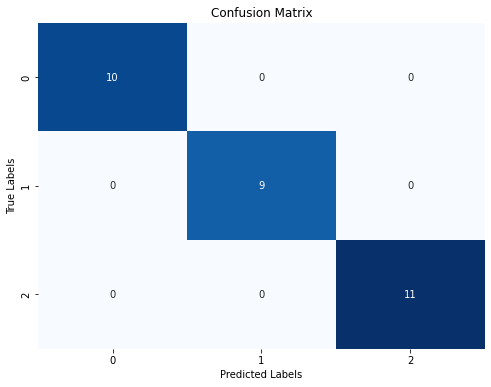

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=lr.classes_,yticklabels=lr.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [100]:
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [101]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores1 = cross_val_score(lr, x_train, y_train, cv=5)
cv_scores1 = np.mean(cv_scores1)
# Print the cross-validated accuracy scores
print("Cross-validated Accuracy:", cv_scores1)


Cross-validated Accuracy: 0.9583333333333334


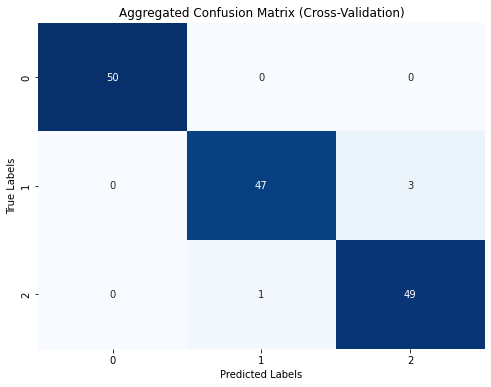

In [102]:
from sklearn.model_selection import cross_val_predict
y_pred_cv1 = cross_val_predict(lr, x, y, cv=5)

# Creating the aggregated confusion matrix
conf_matrix_cv = confusion_matrix(y, y_pred_cv1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Aggregated Confusion Matrix (Cross-Validation)')
plt.show()

In [103]:
classification_report(y,y_pred_cv1)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        50\n           1       0.98      0.94      0.96        50\n           2       0.94      0.98      0.96        50\n\n    accuracy                           0.97       150\n   macro avg       0.97      0.97      0.97       150\nweighted avg       0.97      0.97      0.97       150\n'

#### Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=3,min_samples_split=5,random_state=42)
dt.fit(x_train,y_train)

# make predictions
y_pred2 = dt.predict(x_test)


In [105]:
accuracy2 = accuracy_score(y_test,y_pred2)
accuracy2

1.0

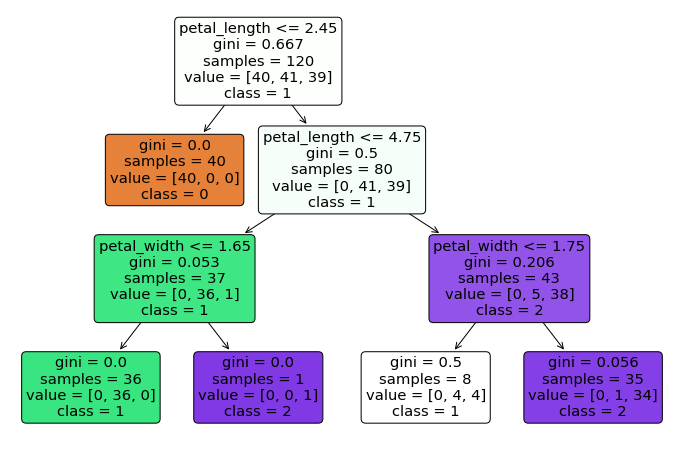

In [107]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=x.columns, class_names=np.unique(y.astype(str)), filled=True, rounded=True)
plt.show()

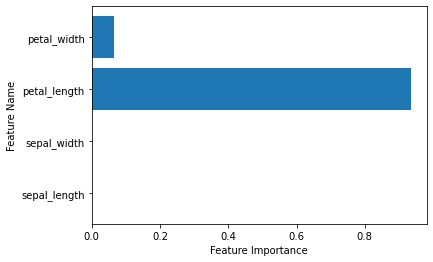

In [108]:
feature_importances = dt.feature_importances_
feature_names = x.columns

plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

In [109]:
cv_scores2 = cross_val_score(dt, x, y, cv=5)
cv_scores2 =  np.mean(cv_scores1)
print("Cross-validated Accuracy:", cv_scores2)

Cross-validated Accuracy: 0.9583333333333334


In [110]:
y_pred_cv2 = cross_val_predict(dt, x, y, cv=5)
class_report_cv2 = classification_report(y, y_pred_cv2)
class_report_cv2

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        50\n           1       0.96      0.96      0.96        50\n           2       0.96      0.96      0.96        50\n\n    accuracy                           0.97       150\n   macro avg       0.97      0.97      0.97       150\nweighted avg       0.97      0.97      0.97       150\n'

#### RandomForestClassifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

# make_predictions
y_pred3 = rf.predict(x_test)

In [112]:
accuracy3 = accuracy_score(y_test,y_pred3)
accuracy3

1.0

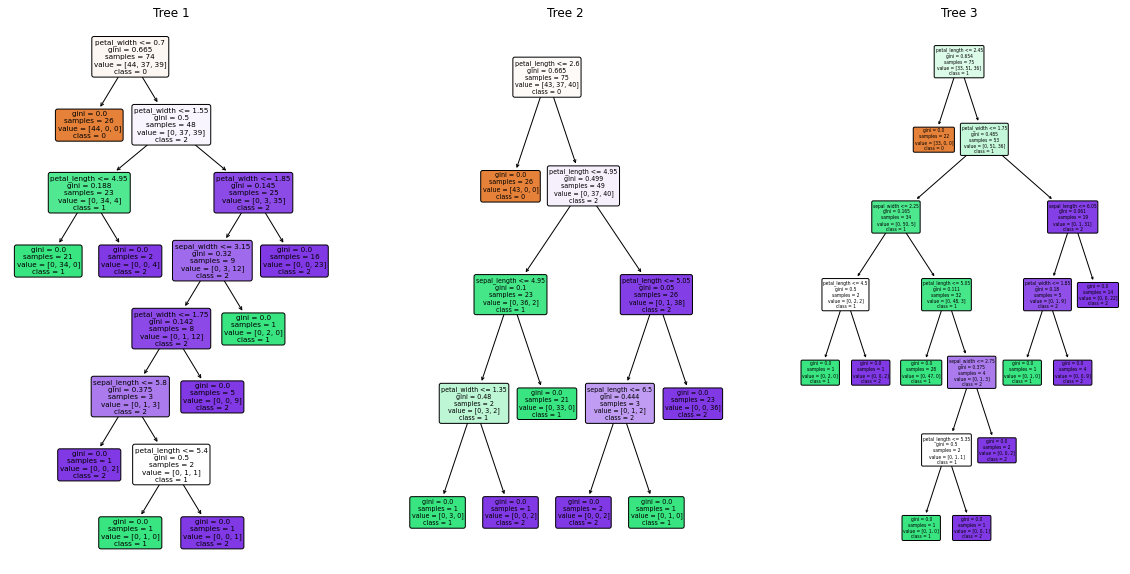

In [114]:
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    tree.plot_tree(rf.estimators_[i], feature_names=x.columns, class_names=np.unique(y.astype(str)), filled=True, rounded=True)
    plt.title(f'Tree {i+1}')
plt.show()

In [115]:
classification_report(y_test,y_pred3)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [143]:
cv_scores3 = cross_val_score(rf, x, y, cv=5)
cv_scores3 = np.mean(cv_scores3)
print("Cross-validated Accuracy:", cv_scores3)

Cross-validated Accuracy: 0.9666666666666668


In [117]:
y_pred_cv3 = cross_val_predict(rf, x, y, cv=5)
y_pred_cv3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

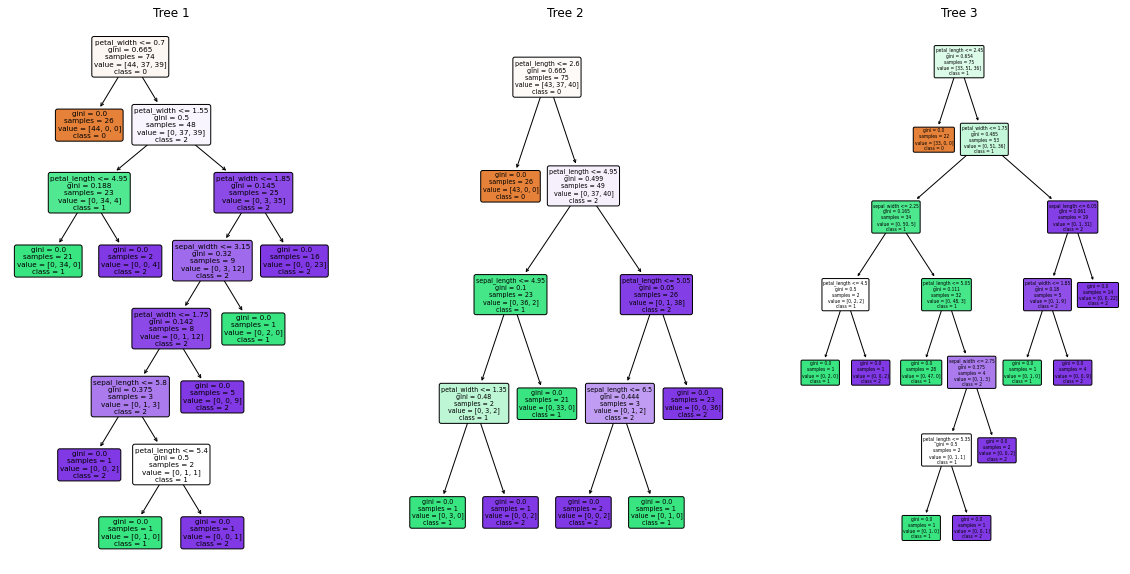

In [146]:
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    tree.plot_tree(rf.estimators_[i], feature_names=x.columns, class_names=np.unique(y_pred_cv3.astype(str)), filled=True, rounded=True)
    plt.title(f'Tree {i+1}')
plt.show()

In [120]:
classification_report(y,y_pred_cv3)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        50\n           1       0.96      0.94      0.95        50\n           2       0.94      0.96      0.95        50\n\n    accuracy                           0.97       150\n   macro avg       0.97      0.97      0.97       150\nweighted avg       0.97      0.97      0.97       150\n'

#### Naive Bayes Classifier

In [121]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()
gb.fit(x_train,y_train)

# Make precitions
y_pred4 = gb.predict(x_test)

In [122]:
accuracy4 = accuracy_score(y_test,y_pred4)
accuracy4

1.0

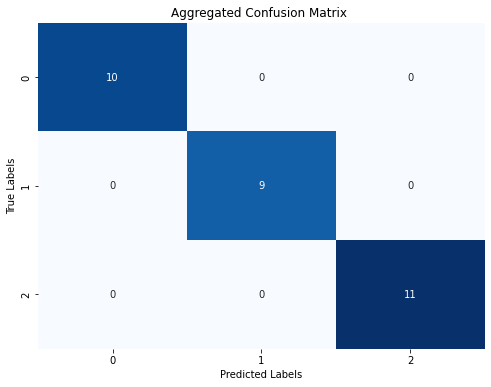

In [126]:
conf_matrix = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=gb.classes_, yticklabels=gb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Aggregated Confusion Matrix for Naive Bayes')
plt.show()

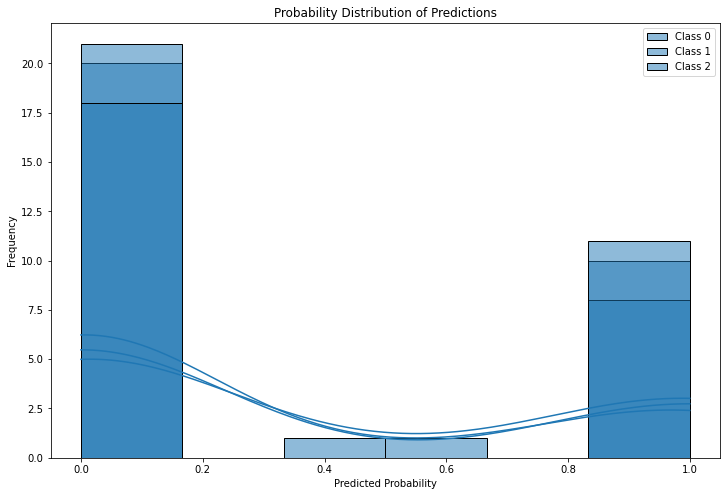

In [141]:
### Probability Distribution Plot
y_prob4 = gb.predict_proba(x_test)
plt.figure(figsize=(12, 8))
for class_idx in range(gb.classes_.shape[0]):
    sns.histplot(y_prob4[:, class_idx], kde=True, label=f'Class {class_idx}')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution of Predictions')
plt.legend()
plt.show()

In [142]:
classification_report(y_test,y_pred4)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [144]:
cv_scores4 = cross_val_score(gb, x, y, cv=5)
cv_scores4 = np.mean(cv_scores4)
print("Cross-validated Accuracy:", cv_scores4)

Cross-validated Accuracy: 0.9533333333333334


In [148]:
y_prob_cv4 = cross_val_predict(gb, x, y,method='predict_proba',cv=5)
y_prob_cv4

array([[1.00000000e+000, 3.09245282e-018, 1.34175966e-026],
       [1.00000000e+000, 4.51359773e-017, 3.41623885e-026],
       [1.00000000e+000, 2.20680852e-018, 2.86500669e-027],
       [1.00000000e+000, 3.00763380e-017, 4.10714689e-026],
       [1.00000000e+000, 8.89701036e-019, 5.85474210e-027],
       [1.00000000e+000, 1.20238633e-014, 5.17599162e-022],
       [1.00000000e+000, 1.42863349e-017, 3.88500205e-026],
       [1.00000000e+000, 1.53331869e-017, 5.09915877e-026],
       [1.00000000e+000, 1.68311927e-017, 1.39396582e-026],
       [1.00000000e+000, 1.07226730e-017, 1.72095731e-026],
       [1.00000000e+000, 2.30562160e-018, 4.27591447e-026],
       [1.00000000e+000, 4.05771740e-018, 3.11826175e-026],
       [1.00000000e+000, 2.84664969e-019, 1.03845587e-027],
       [1.00000000e+000, 4.59204156e-020, 6.06524257e-029],
       [1.00000000e+000, 7.43754908e-019, 1.91630725e-026],
       [1.00000000e+000, 2.06037167e-012, 2.97994019e-021],
       [1.00000000e+000, 7.14627985e-017

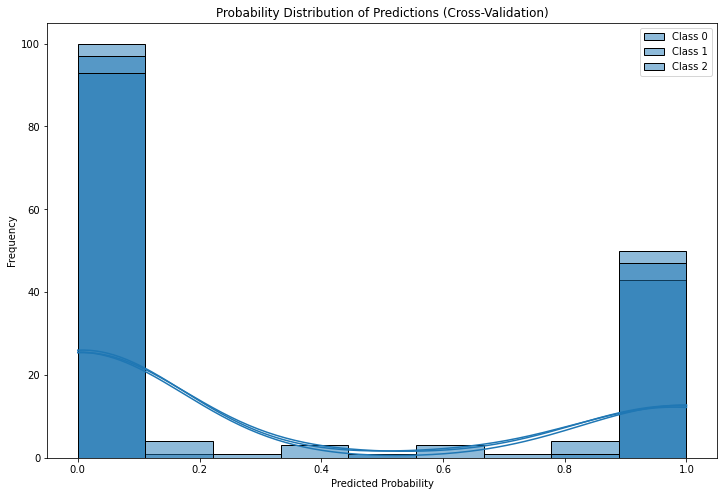

In [149]:
plt.figure(figsize=(12, 8))
for class_idx in range(gb.classes_.shape[0]):
    sns.histplot(y_prob_cv4[:, class_idx], kde=True, label=f'Class {class_idx}')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution of Predictions (Cross-Validation)')
plt.legend()
plt.show()

In [151]:
y_pred_cv4 = cross_val_predict(gb, x, y, cv=5)
classification_report(y,y_pred_cv4)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        50\n           1       0.92      0.94      0.93        50\n           2       0.94      0.92      0.93        50\n\n    accuracy                           0.95       150\n   macro avg       0.95      0.95      0.95       150\nweighted avg       0.95      0.95      0.95       150\n'

#### Comparing the model scores

In [153]:
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression' : LogisticRegression()
}

results_df = pd.DataFrame(columns=['Model', 'Cross-Validation Score Mean', 'Cross-Validation Score Std'])


In [154]:
# Evaluate each model
for model_name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
    
    # Store results in the DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'Cross-Validation Score Mean': scores.mean(),
        'Cross-Validation Score Std': scores.std()
    }, ignore_index=True)

In [156]:
results_df

,Model,Cross-Validation Score Mean,Cross-Validation Score Std
0,Gaussian Naive Bayes,0.953333,0.026667
1,Decision Tree,0.96,0.03266
2,Random Forest,0.96,0.024944
3,Logistic Regression,0.973333,0.024944


In [158]:
results_df['Cross-Validation Score Mean'] = pd.to_numeric(results_df['Cross-Validation Score Mean'], errors='coerce')

best_model = results_df.loc[results_df['Cross-Validation Score Mean'].idxmax()]
best_model

Model                          Logistic Regression
Cross-Validation Score Mean               0.973333
Cross-Validation Score Std                0.024944
Name: 3, dtype: object

#### Logistic Regression has the highest mean cross-validation score of 97.33%. This indicates that, on average, the Logistic Regression model performed well across different folds of the cross-validation process. The relatively low standard deviation (0.024944) suggests that the performance consistency is high.

####   
Logistic Regression is the best-performing model on average for the Iris dataset in your evaluation. It's important to consider both mean and standard deviation to understand not only the average performance but also the consistency of the model across different folds.